<a href="https://colab.research.google.com/github/dguti97/Taller2_ANN/blob/master/Taller2_Parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Propuesta Taller 2

In [ ]:
from keras.models import Sequential
from keras.datasets import cifar10,mnist,cifar100,fashion_mnist
from keras.layers import Conv2D,Flatten,Reshape,MaxPool2D,UpSampling2D,Dense,InputLayer,Conv1D,MaxPooling1D,AveragePooling1D,UpSampling1D
from keras.models import Model
from keras.layers import Input
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Dataset Sintetico


In [ ]:
def lagrange(x_i, y_i):
    n = x_i.shape[-1]
    L = lambda x: np.dot(y_i, np.array([np.prod(x - np.delete(x_i, k)) 
                                        / np.prod(x_i[k] - np.delete(x_i, k)) for k in range(n)]))
    return np.vectorize(L)

#Se le entrega un porcentaje de etiquetas
#Retorna el X_train sin etiquetar y X_train con % de etiquetas
def dataset_sintetico(perc):
  rango_n = 20
  n_data = 1000
  X_train_1 = []
  X_train_2 = []
  cont = 0
  cont1 = 0
  for i in range(n_data):
    x_i = np.random.randint(rango_n, size=5)
    y_i = np.random.randint(rango_n, size=5)
    L = lagrange(x_i, y_i)
    interpol_1 = L(1)
    while(np.isinf(interpol_1) or np.isnan(interpol_1)):
      x_i = np.random.randint(rango_n, size=5)
      y_i = np.random.randint(rango_n, size=5)
      L = lagrange(x_i, y_i)
      interpol_1 = L(1)
    if interpol_1 > 10:
      label = 1
      cont1+=1
    else:
      label = -1
      cont+=1
    if (i < n_data*perc):
      X_train_1.append([x_i[0], y_i[0], x_i[1], y_i[1], x_i[2], y_i[2],x_i[3], y_i[3], x_i[4], y_i[4], label])
      X_train_2.append([x_i[0], y_i[0], x_i[1], y_i[1], x_i[2], y_i[2],x_i[3], y_i[3], x_i[4], y_i[4]])
    else:
      X_train_1.append([x_i[0], y_i[0], x_i[1], y_i[1], x_i[2], y_i[2],x_i[3], y_i[3], x_i[4], y_i[4], 0])
      X_train_2.append([x_i[0], y_i[0], x_i[1], y_i[1], x_i[2], y_i[2],x_i[3], y_i[3], x_i[4], y_i[4]])
  return np.array(X_train_1), np.array(X_train_2)

perc = [0.2, 0.1, 0.05, 1]
X_trains = []
for i in perc:
  X_train_1, X_train_2 = dataset_sintetico(i)
  X_trains.append(X_train_1)
  X_trains.append(X_train_2)  

#PARES TIENEN PERC PORCENTAJE DE ETIQUETAS
#IMPARES NO TIENEN ETIQUETA

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in long_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2167: RuntimeWarning: divide by zero encountered in ? (vectorized)
  outputs = ufunc(*inputs)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.


In [ ]:
from keras import regularizers
def autoencoder(X_train):

  lamb = 1e-4
  d_E = 4
  d = X_train.shape[1:]

  model = Sequential()
  model.add(InputLayer(input_shape=(d)))

  model.add(Dense(units=4, activation="relu", name="embedding_function",
                  activity_regularizer=regularizers.l1(lamb)))  #norma l1

  model.add(Dense(units=d[0], activation='linear', name="reconstruction"))

  model.summary()

  model.compile(optimizer= 'Adam', loss='mse')
  model.fit(X_train, X_train, epochs=50, batch_size = 32)

  return None

In [ ]:
#Sin etiquetas

autoencoder(X_trains[0])

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_function (Dense)   (None, 4)                 48        
_________________________________________________________________
reconstruction (Dense)       (None, 11)                55        
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1000/1000 [==============================] - 0s 129us/step - loss: 96.9711
Epoch 2/50
1000/1000 [==============================] - 0s 69us/step - loss: 85.1190
Epoch 3/50
1000/1000 [==============================] - 0s 69us/step - loss: 73.9515
Epoch 4/50
1000/1000 [==============================] - 0s 72us/step - loss: 65.2812
Epoch 5/50
1000/1000 [==============================] - 0s 70us/step - loss: 58.7649
Epoch 6/50
1000/1000 [==============================] - 0s 65us/step - loss: 53.5887
Epoch 

In [ ]:
#Para un 20%
#Con etiquetas
print(X_trains[0])
autoencoder(X_trains[0])

[[ 1  2 17 ...  0 14 -1]
 [ 3  7  6 ... 18 13 -1]
 [ 4 18  8 ...  9  1 -1]
 ...
 [ 0 13 17 ...  3  9  0]
 [ 9  5  4 ... 17 13  0]
 [16 18 19 ... 18  8  0]]
Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_function (Dense)   (None, 4)                 48        
_________________________________________________________________
reconstruction (Dense)       (None, 11)                55        
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1000/1000 [==============================] - 0s 129us/step - loss: 270.1850
Epoch 2/50
1000/1000 [==============================] - 0s 70us/step - loss: 202.4586
Epoch 3/50
1000/1000 [==============================] - 0s 70us/step - loss: 154.1192
Epoch 4/50
1000/1000 [==============================] - 0s 75us/step - loss: 113.0801
Epoch 5/50
1000/

In [ ]:
#Para un 10%
#Con etiquetas

autoencoder(X_trains[2])

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_function (Dense)   (None, 4)                 48        
_________________________________________________________________
reconstruction (Dense)       (None, 11)                55        
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1000/1000 [==============================] - 0s 128us/step - loss: 171.8355
Epoch 2/50
1000/1000 [==============================] - 0s 64us/step - loss: 142.0277
Epoch 3/50
1000/1000 [==============================] - 0s 72us/step - loss: 122.3409
Epoch 4/50
1000/1000 [==============================] - 0s 69us/step - loss: 108.3430
Epoch 5/50
1000/1000 [==============================] - 0s 67us/step - loss: 97.7013
Epoch 6/50
1000/1000 [==============================] - 0s 69us/step - loss: 88.9664
Ep

In [ ]:
#Para un 5%
#Con etiquetas
autoencoder(X_trains[4])

Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_function (Dense)   (None, 4)                 48        
_________________________________________________________________
reconstruction (Dense)       (None, 11)                55        
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1000/1000 [==============================] - 0s 122us/step - loss: 210.9173
Epoch 2/50
1000/1000 [==============================] - 0s 64us/step - loss: 156.3203
Epoch 3/50
1000/1000 [==============================] - 0s 75us/step - loss: 123.8957
Epoch 4/50
1000/1000 [==============================] - 0s 66us/step - loss: 103.7048
Epoch 5/50
1000/1000 [==============================] - 0s 72us/step - loss: 89.8544
Epoch 6/50
1000/1000 [==============================] - 0s 65us/step - loss: 79.5654
Ep

In [ ]:
#Para un 100%
#Con etiquetas
print(X_trains[6])
autoencoder(X_trains[6])

[[17 14 10 ...  3  6  1]
 [17  6  2 ... 12  9 -1]
 [16  0  6 ...  0  9 -1]
 ...
 [11  6  9 ...  7  7 -1]
 [ 4 14 11 ...  0  3 -1]
 [12  0  2 ...  3  8  1]]
Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_function (Dense)   (None, 4)                 48        
_________________________________________________________________
reconstruction (Dense)       (None, 11)                55        
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1000/1000 [==============================] - 0s 141us/step - loss: 130.6872
Epoch 2/50
1000/1000 [==============================] - 0s 73us/step - loss: 115.5736
Epoch 3/50
1000/1000 [==============================] - 0s 80us/step - loss: 104.3077
Epoch 4/50
1000/1000 [==============================] - 0s 71us/step - loss: 89.8732
Epoch 5/50
1000/1

#Se utiliza la propuesta dos para este dataset (pre-entrenar y obtener Z para luego hacer aprendizaje supervisado de Z enves de X)

In [ ]:
from sklearn.model_selection import train_test_split
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

print(x_train.shape)
print(x_test.shape)
print(y_train)
print(x_subtrain.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
[9 0 0 ... 3 0 5]
(48000, 28, 28, 1)


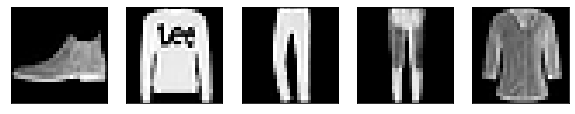

In [ ]:
n = 5
plt.figure(figsize=(10, 5))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Pre-entrenamos utilizando un autoencoder VAE

In [ ]:
from keras.layers import Lambda
from keras import backend as K
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], K.shape(z_mean)[1]), mean=0., stddev=1.)
    return z_mean + K.exp(z_log_sigma) * epsilon #muestreo explicito para normal


x = Input(shape=x_train.shape[1:], name='input')

f = Conv2D(16, (3,3), activation="relu", padding='same') (x)
f = MaxPool2D((2,2), padding='same')(f)
f = Conv2D(32, (3,3), activation="relu", padding='same')(f)
f = MaxPool2D((2,2), padding='same') (f)

f = Flatten()(f)

E_function1 = Dense(units=16, activation="linear", name="embedding_function_mu") #encoder
E_function2 = Dense(units=16, activation="linear", name="embedding_function_sigma") #encoder
#parametros de distribucion Normal: mu y log(s)
z_mean = E_function1(f)
z_log_sigma = E_function2(f)

encoder_model = Model(x, [z_mean,z_log_sigma], name="encoder-phase")
encoder_model.summary()


#muestreo
z_sampled = Lambda(sampling, output_shape=(16,))([z_mean, z_log_sigma])
#reconstruccion
decoder_input = Input(shape=(16,))
r = Dense(1568)(decoder_input)
r = Reshape((7,7,32))(r)
r = Conv2D(32, (3,3), activation="relu", padding='same')(r)
r = UpSampling2D((2,2))(r)
r = Conv2D(16, (3,3), activation="relu", padding='same')(r)
r = UpSampling2D((2,2))(r)
x_hat = Conv2D(filters=1, kernel_size=(1,1), activation='sigmoid', name="reconstruction")(r)
generator_model = Model(decoder_input, x_hat, name="decoder-phase")
generator_model.summary()


model = Model(inputs=x, outputs=generator_model( z_sampled) )

model.summary()

NameError: ignored

(None, 28, 28, 1)


In [ ]:
from keras.losses import mean_squared_error, binary_crossentropy
def vae_loss(x, x_decoded):
    rec_loss = K.mean( K.binary_crossentropy(x, x_decoded), axis=(1,2,3))
    kl_loss = - 0.5 * K.sum(1 + 2*z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)**2, axis=-1)
    lamb = 1./np.prod(x_train.shape[1:])
    print("Lambda para KL =",lamb)
    return rec_loss + lamb* kl_loss

model.compile(loss=vae_loss, optimizer='adam')
model.fit(x_train, x_train,   epochs=30, batch_size=128)

Lambda para KL = 0.0012755102040816326
Epoch 1/30
60000/60000 [==============================] - 3s 56us/step - loss: 0.3799
Epoch 2/30
60000/60000 [==============================] - 3s 51us/step - loss: 0.3389
Epoch 3/30
60000/60000 [==============================] - 3s 51us/step - loss: 0.3353
Epoch 4/30
60000/60000 [==============================] - 3s 51us/step - loss: 0.3335
Epoch 5/30
60000/60000 [==============================] - 3s 51us/step - loss: 0.3324
Epoch 6/30
60000/60000 [==============================] - 3s 51us/step - loss: 0.3316
Epoch 7/30
60000/60000 [==============================] - 3s 51us/step - loss: 0.3310
Epoch 8/30
60000/60000 [==============================] - 3s 51us/step - loss: 0.3306
Epoch 9/30
60000/60000 [==============================] - 3s 51us/step - loss: 0.3302
Epoch 10/30
60000/60000 [==============================] - 3s 50us/step - loss: 0.3300
Epoch 11/30
60000/60000 [==============================] - 3s 51us/step - loss: 0.3297
Epoch 12/30
6

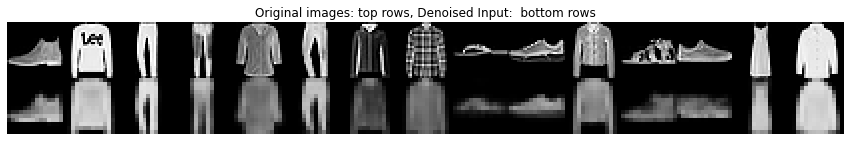

In [ ]:
# Predict the Autoencoder output from corrupted test images
x_decoded = VAE_model.predict(x_test)
x_subtest, x_subtest2, y_subtest, y_subtest2 = train_test_split(
x_decoded, y_test, test_size=0.2, random_state=42)

# Display the 1st 8 corrupted and denoised images
rows, cols = 1, 15
num = rows * cols
imgs = np.concatenate([x_test[:num],x_decoded[:num]])
imgs = imgs.reshape((rows * 2, cols, 28, 28))
imgs = np.vstack(np.split(imgs, rows, axis=0))
imgs = imgs.reshape((rows * 2, -1, 28, 28))
imgs = np.vstack([np.hstack(i) for i in imgs])
imgs = (imgs * 255).astype(np.uint8)
plt.figure(figsize=(15,15))
plt.axis('off')
plt.title('Original images: top rows, '
          'Denoised Input:  bottom rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.show()

# Entrenamos el reusltado del autoencoder de manera supervisada

In [ ]:
y_subtest = keras.utils.to_categorical(y_subtest, 10)
y_subtest2 = keras.utils.to_categorical(y_subtest2, 10)

def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.3))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  # compile model
  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

model_6 = define_model()
#model_6.summary()
model_6.fit(x_subtest, y_subtest, epochs=10, batch_size=64, verbose=1, validation_data=(x_subtest2,y_subtest2))

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 3s 428us/step - loss: 1.2279 - accuracy: 0.5943 - val_loss: 1.8445 - val_accuracy: 0.2995
Epoch 2/10
8000/8000 [==============================] - 2s 258us/step - loss: 0.8006 - accuracy: 0.7079 - val_loss: 1.0512 - val_accuracy: 0.5920
Epoch 3/10
8000/8000 [==============================] - 2s 261us/step - loss: 0.7110 - accuracy: 0.7336 - val_loss: 0.6856 - val_accuracy: 0.7460
Epoch 4/10
8000/8000 [==============================] - 2s 258us/step - loss: 0.6607 - accuracy: 0.7527 - val_loss: 0.6178 - val_accuracy: 0.7655
Epoch 5/10
8000/8000 [==============================] - 2s 261us/step - loss: 0.6446 - accuracy: 0.7548 - val_loss: 0.5996 - val_accuracy: 0.7775
Epoch 6/10
8000/8000 [==============================] - 2s 255us/step - loss: 0.6164 - accuracy: 0.7665 - val_loss: 0.5632 - val_accuracy: 0.7965
Epoch 7/10
8000/8000 [==============================] - 2s 254us/step - loss

# Entrenamos un modelo solo de manera supervisada 

In [ ]:
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Input, AveragePooling2D
from keras.utils import to_categorical
import keras
x_subtest, x_subtest2, y_subtest, y_subtest2 = train_test_split(
x_test, y_test, test_size=0.2, random_state=42)
y_subtest = keras.utils.to_categorical(y_subtest, 10)
y_subtest2 = keras.utils.to_categorical(y_subtest2, 10)

 
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    # compile model
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_6 = define_model()
#model_6.summary()
model_6.fit(x_subtest, y_subtest, epochs=10, batch_size=64, verbose=1, validation_data=(x_subtest2,y_subtest2))



Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 3s 430us/step - loss: 1.2365 - accuracy: 0.6026 - val_loss: 1.4837 - val_accuracy: 0.4645
Epoch 2/10
8000/8000 [==============================] - 2s 260us/step - loss: 0.7361 - accuracy: 0.7471 - val_loss: 0.9680 - val_accuracy: 0.6230
Epoch 3/10
8000/8000 [==============================] - 2s 257us/step - loss: 0.6039 - accuracy: 0.7796 - val_loss: 0.6182 - val_accuracy: 0.7645
Epoch 4/10
8000/8000 [==============================] - 2s 255us/step - loss: 0.5240 - accuracy: 0.8108 - val_loss: 0.4625 - val_accuracy: 0.8300
Epoch 5/10
8000/8000 [==============================] - 2s 257us/step - loss: 0.4814 - accuracy: 0.8266 - val_loss: 0.4121 - val_accuracy: 0.8500
Epoch 6/10
8000/8000 [==============================] - 2s 255us/step - loss: 0.4412 - accuracy: 0.8389 - val_loss: 0.3821 - val_accuracy: 0.8585
Epoch 7/10
8000/8000 [==============================] - 2s 258us/step - loss

# PROPUESTA 3

In [ ]:
%matplotlib inline
import numpy as np
import time
import keras
import pandas as pd
import math
import joblib
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
from IPython.display import display

from keras.layers import (Input, Dense, Lambda, Flatten, Reshape, BatchNormalization, Activation, 
                          Dropout, Conv2D, Conv2DTranspose, MaxPooling2D)
from keras.layers.merge import concatenate
from keras.regularizers import l2
from keras.initializers import RandomUniform
from keras.optimizers import RMSprop, Adam, SGD
from keras.models import Model
from keras import metrics
from keras.utils import np_utils
from keras import backend as K
from keras.datasets import mnist

In [ ]:
img_rows, img_cols, img_chns = 28, 28, 1

if K.image_data_format() == 'channels_first':
    original_img_size = (img_chns, img_rows, img_cols)
else:
    original_img_size = (img_rows, img_cols, img_chns)

batch_size = 200
latent_dim = 128
intermediate_dim = 512
epsilon_std = 1.0
epochs = 10
activation = 'relu'
dropout = 0.5
learning_rate = 0.001
decay = 0.0
num_classes = 10

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1) / 255.
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1) / 255.

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [ ]:

def create_enc_conv_layers(stage, **kwargs):
    conv_name = '_'.join(['enc_conv', str(stage)])
    bn_name = '_'.join(['enc_bn', str(stage)])
    layers = [
        Conv2D(name=conv_name, **kwargs),
        BatchNormalization(name=bn_name),
        Activation(activation),
    ]
    return layers

def create_dense_layers(stage, width):
    dense_name = '_'.join(['enc_conv', str(stage)])
    bn_name = '_'.join(['enc_bn', str(stage)])
    layers = [
        Dense(width, name=dense_name),
        BatchNormalization(name=bn_name),
        Activation(activation),
        Dropout(dropout),
    ]
    return layers

def inst_layers(layers, in_layer):
    x = in_layer
    for layer in layers:
        if isinstance(layer, list):
            x = inst_layers(layer, x)
        else:
            x = layer(x)
        
    return x

In [ ]:

enc_filters=64
enc_layers = [
    create_enc_conv_layers(stage=1, filters=enc_filters, kernel_size=3, strides=1, padding='same'),
    create_enc_conv_layers(stage=2, filters=enc_filters, kernel_size=3, strides=1, padding='same'),
    create_enc_conv_layers(stage=3, filters=enc_filters, kernel_size=3, strides=2, padding='same'),
    Flatten(),
    create_dense_layers(stage=4, width=intermediate_dim),
]

In [ ]:
x_in = Input(batch_shape=(batch_size,) + original_img_size)
y_in = Input(batch_shape=(batch_size, num_classes))
_enc_dense = inst_layers(enc_layers, x_in)

_z_mean_1 = Dense(latent_dim)(_enc_dense)
_z_log_var_1 = Dense(latent_dim)(_enc_dense)

z_mean = _z_mean_1
z_log_var = _z_log_var_1

In [ ]:
def sampling(args, batch_size=batch_size, latent_dim=latent_dim, epsilon_std=epsilon_std):
    z_mean, z_log_var = args
    
    epsilon = K.random_normal(shape=(batch_size, latent_dim),
                              mean=0., stddev=epsilon_std)
    
    return z_mean + K.exp(z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

In [ ]:
classifier_layers = [
    Conv2D(32, (3, 3), padding='same'),
    Activation('relu'),
    Conv2D(32, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), padding='same'),
    Activation('relu'),
    Conv2D(64, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax'),
]

In [ ]:
_cls_output = inst_layers(classifier_layers, x_in)
_y_output = _cls_output

In [ ]:
def create_dec_trans_conv_layers(stage, **kwargs):
    conv_name = '_'.join(['dec_trans_conv', str(stage)])
    bn_name = '_'.join(['dec_bn', str(stage)])
    layers = [
        Conv2DTranspose(name=conv_name, **kwargs),
        BatchNormalization(name=bn_name),
        Activation(activation),
    ]
    return layers

In [ ]:
dec_filters = 64
decoder_layers = [
    create_dense_layers(stage=10, width=14 * 14 * 64),
    Reshape((14, 14, 64)),
    create_dec_trans_conv_layers(11, filters=dec_filters, kernel_size=3, strides=1, padding='same'),
    create_dec_trans_conv_layers(12, filters=dec_filters, kernel_size=3, strides=1, padding='same'),
    create_dec_trans_conv_layers(13, filters=dec_filters, kernel_size=3, strides=2, padding='same'),
    Conv2DTranspose(name='x_decoded', filters=1, kernel_size=1, strides=1, activation='sigmoid'),
]

In [ ]:
# Labeled decoder
_merged = concatenate([y_in, z])
_dec_out = inst_layers(decoder_layers, _merged)
_x_output = _dec_out

# Unlabeled decoder
u_merged = concatenate([_y_output, z])
u_dec_out = inst_layers(decoder_layers, u_merged)
u_x_output = u_dec_out

In [ ]:
def kl_loss(x, x_decoded_mean, z_mean=z_mean, z_log_var=z_log_var):
    kl_loss = - 0.5 * K.sum(1. + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
   
    return K.mean(kl_loss)

def logxy_loss(x, x_decoded_mean):
    x = K.flatten(x)
    x_decoded_mean = K.flatten(x_decoded_mean)
    xent_loss = img_rows * img_cols * img_chns * metrics.binary_crossentropy(x, x_decoded_mean)
   
    # p(y) for observed data is equally distributed
    logy = np.log(1. / num_classes)
    
    return xent_loss - logy

def labeled_vae_loss(x, x_decoded_mean):
    return logxy_loss(x, x_decoded_mean) + kl_loss(x, x_decoded_mean)

def cls_loss(y, y_pred, N=1000):
    alpha = 0.1 * N
    return alpha * metrics.categorical_crossentropy(y, y_pred)

def unlabeled_vae_loss(x, x_decoded_mean):
    entropy = metrics.categorical_crossentropy(_y_output, _y_output)
    # This is probably not correct, see discussion here: https://github.com/bjlkeng/sandbox/issues/3
    labeled_loss = logxy_loss(x, x_decoded_mean) + kl_loss(x, x_decoded_mean)
    
    return K.mean(K.sum(_y_output * labeled_loss, axis=-1)) + entropy

In [ ]:
label_vae = Model(inputs=[x_in, y_in], outputs=[_x_output, _y_output])
optimizer = Adam(lr=learning_rate, decay=decay)
label_vae.compile(optimizer=optimizer, loss=[labeled_vae_loss, cls_loss])
label_vae.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (200, 28, 28, 1)     0                                            
__________________________________________________________________________________________________
enc_conv_1 (Conv2D)             (200, 28, 28, 64)    640         input_5[0][0]                    
__________________________________________________________________________________________________
enc_bn_1 (BatchNormalization)   (200, 28, 28, 64)    256         enc_conv_1[0][0]                 
__________________________________________________________________________________________________
activation_1 (Activation)       (200, 28, 28, 64)    0           enc_bn_1[0][0]                   
____________________________________________________________________________________________

In [ ]:
unlabeled_vae = Model(inputs=x_in, outputs=u_x_output)
optimizer = Adam(lr=learning_rate, decay=decay)
unlabeled_vae.compile(optimizer=optimizer, loss=unlabeled_vae_loss)
unlabeled_vae.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (200, 28, 28, 1)     0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (200, 28, 28, 32)    320         input_5[0][0]                    
__________________________________________________________________________________________________
activation_5 (Activation)       (200, 28, 28, 32)    0           conv2d_15[0][0]                  
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (200, 26, 26, 32)    9248        activation_5[0][0]               
____________________________________________________________________________________________

In [ ]:
from tqdm import tnrange, tqdm_notebook
def fit_model(X_unlabeled, X_labeled, y_labeled, epochs):
    assert len(X_unlabeled) % len(X_labeled) == 0, \
            (len(X_unlabeled), batch_size, len(X_labeled))
    start = time.time()
    history = []
    
    for epoch in tnrange(epochs):
        unlabeled_index = np.arange(len(X_unlabeled))
        np.random.shuffle(unlabeled_index)
        
        # Repeat the labeled data to match length of unlabeled data
        labeled_index = []
        for i in range(len(X_unlabeled) // len(X_labeled)):
            l = np.arange(len(X_labeled))
            np.random.shuffle(l)
            labeled_index.append(l)
        labeled_index = np.concatenate(labeled_index)
        
        batches = len(X_unlabeled) // batch_size
        with tnrange(batches, leave=False) as pbar:
            for i in range(batches):
                # Labeled
                index_range =  labeled_index[i * batch_size:(i+1) * batch_size]
                loss = label_vae.train_on_batch([X_labeled[index_range], y_labeled[index_range]], 
                                                [X_labeled[index_range], y_labeled[index_range]])
                
                # Unlabeled
                index_range =  unlabeled_index[i * batch_size:(i+1) * batch_size]
                loss += [unlabeled_vae.train_on_batch(X_unlabeled[index_range],  X_unlabeled[index_range])]
                pbar.desc = 'Loss: %s' % loss
                history.append(loss)
                
                pbar.update(1)
    
   
    done = time.time()
    elapsed = done - start
    print("Elapsed: ", elapsed)
    
    return history

In [ ]:
sample_size = 1000
start = time.time()
print('Fitting with sample_size: {}'.format(sample_size))

if sample_size < len(X_train):
    sss = StratifiedShuffleSplit(n_splits=2, test_size=sample_size / len(X_train), random_state=0)
    _, index = sss.split(X_train, y_train)
    X, y = X_train[index[1]], y_train[index[1]]
    X_others, _ = X_train[index[0]], y_train[index[0]]
else:
    X, y = X_train, y_train

y = np_utils.to_categorical(y)

history = fit_model(X_others, X, y, epochs=epochs)

classifier = Model(inputs=[x_in], outputs=[_y_output])

y_pred = np.argmax(classifier.predict(X_test, batch_size=batch_size), axis=-1)
score = accuracy_score(y_test, y_pred)

end = time.time()
elapsed = end - start
print(' * Accuracy: %.1f %%' % (100. * score))
print(' * Fit time elapsed: %.1fs' % elapsed)

results = []
results.append({'sample_size': sample_size, 'accuracy': score, 'time': elapsed})

Fitting with sample_size: 1000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  import sys


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`



Elapsed:  357.01032066345215
 * Accuracy: 97.4 %
 * Fit time elapsed: 357.4s


,labeled_loss,labeled_loss2,classifier_loss,unlabeled_loss
count,2950.000000,2950.000000,2950.000000,2950.000000
mean,104.024390,97.646573,6.377817,99.620630
std,63.454924,38.586623,27.137056,32.519025
min,77.329880,76.385612,0.009666,80.646561
0%,77.329880,76.385612,0.009666,80.646561
25%,84.838709,84.074476,0.375670,87.179831
50%,89.965652,88.937176,0.958739,91.587872
75%,98.999149,96.884119,2.614362,98.963539
95%,155.887280,135.527094,20.673972,136.829147
99%,411.723671,248.550717,159.101996,240.408440


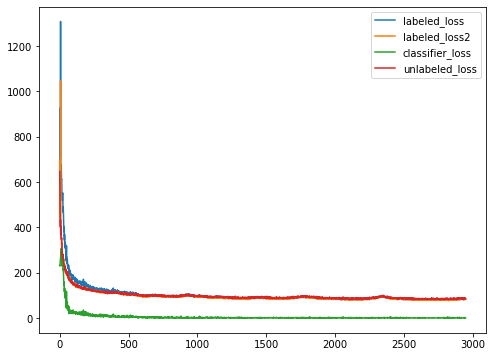

In [ ]:

df = pd.DataFrame(history, columns=['labeled_loss', 'labeled_loss2', 'classifier_loss', 'unlabeled_loss'])
display(df.describe(percentiles=[0.25 * i for i in range(4)] + [0.95, 0.99]))
df.plot(figsize=(8, 6))

In [ ]:
g_y = Input(shape=(num_classes,))
g_z = Input(shape=(latent_dim,))
g_merged = concatenate([g_y, g_z])
g_output = inst_layers(decoder_layers, g_merged)
generator = Model([g_y, g_z], g_output)

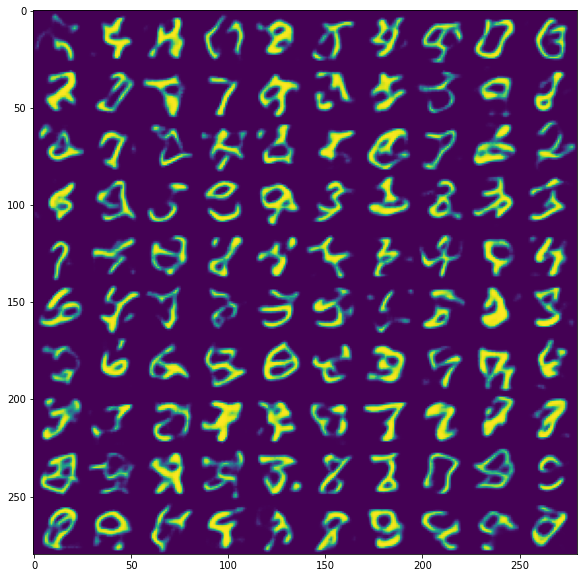

In [ ]:
import matplotlib.pyplot as plt
n = 10
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

for j in range(n):
    for i in range(n):
        y_sample = np.zeros(num_classes).reshape(1, num_classes)
        y_sample[0, i] = 1
        z_sample = np.random.normal(size=latent_dim).reshape(1, latent_dim)
        x_decoded = generator.predict([y_sample, z_sample], batch_size=1)
        digit = x_decoded.reshape(digit_size, digit_size)
        
        d_x = i * digit_size
        d_y = j * digit_size
        figure[d_x:d_x + digit_size, d_y:d_y + digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

In [ ]:
df = pd.DataFrame(results)
display(df)
df.to_csv('vae-m2-mnist_results.csv', index=False)

,sample_size,accuracy,time
0,1000,0.9736,357.408104
